In [1]:
import json
from PIL import Image, ImageDraw 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder


C:\Users\DINHDUY\AppData\Local\Temp\ipykernel_11548\3614514833.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Config Directories

In [2]:
#BDD Annotation
vgRoot = 'VisualGenome/'

vgAttr = vgRoot+'Annotation/attributes.json'
vgSG = vgRoot+'Annotation/scene_graphs.json'


In [3]:
fVG = open(vgAttr)
dataAttr = json.load(fVG)
len(dataAttr)

108077

In [4]:
fVG = open(vgSG)
dataSG = json.load(fVG)
len(dataSG)

108077

In [18]:
dataItemAttr = dataAttr[268]
dataItemAttr

{'image_id': 269,
 'attributes': [{'synsets': ['leaf.n.01'],
   'h': 147,
   'object_id': 1634834,
   'names': ['leaves'],
   'w': 185,
   'y': 22,
   'x': 196},
  {'synsets': ['tree.n.01'],
   'h': 238,
   'object_id': 1634835,
   'names': ['trees'],
   'w': 643,
   'attributes': ['green'],
   'y': 8,
   'x': 152},
  {'synsets': ['tree.n.01'],
   'h': 240,
   'object_id': 3563089,
   'names': ['trees'],
   'w': 256,
   'attributes': ['leafy'],
   'y': 1,
   'x': 519},
  {'synsets': ['barrel.n.01'],
   'h': 73,
   'object_id': 1634836,
   'names': ['barrel'],
   'w': 48,
   'attributes': ['orange', 'white'],
   'y': 280,
   'x': 73},
  {'synsets': ['sign.n.02'],
   'h': 34,
   'object_id': 3563091,
   'names': ['sign'],
   'w': 29,
   'y': 241,
   'x': 82},
  {'synsets': ['sidewalk.n.01'],
   'h': 75,
   'object_id': 1634837,
   'names': ['sidewalk'],
   'w': 227,
   'y': 221,
   'x': 457},
  {'synsets': ['people.n.01'],
   'h': 56,
   'object_id': 3563092,
   'names': ['people'],
   '

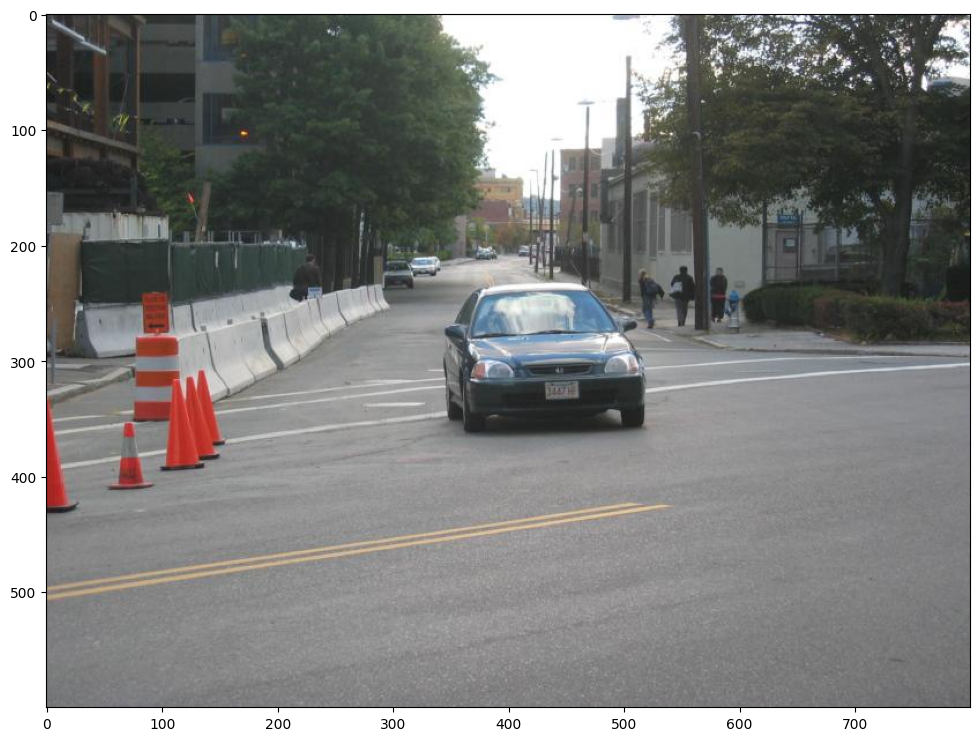

In [19]:
vgRootImage = 'VisualGenome/VG_100K/'
image = Image.open(vgRootImage+str(dataItemAttr['image_id']) + '.jpg')
plt.figure(figsize=(16,9))
plt.imshow(image)

196 22 185 147 leaves
152 8 643 238 trees
519 1 256 240 trees
73 280 48 73 barrel
82 241 29 34 sign
457 221 227 75 sidewalk
509 215 82 56 people
540 220 28 50 woman
538 231 14 13 bag
572 267 203 32 sidewalk
161 96 22 16 window
163 96 14 14 light
557 9 19 268 tree
291 209 27 34 car
467 86 330 190 building
611 172 91 68 chain link fence


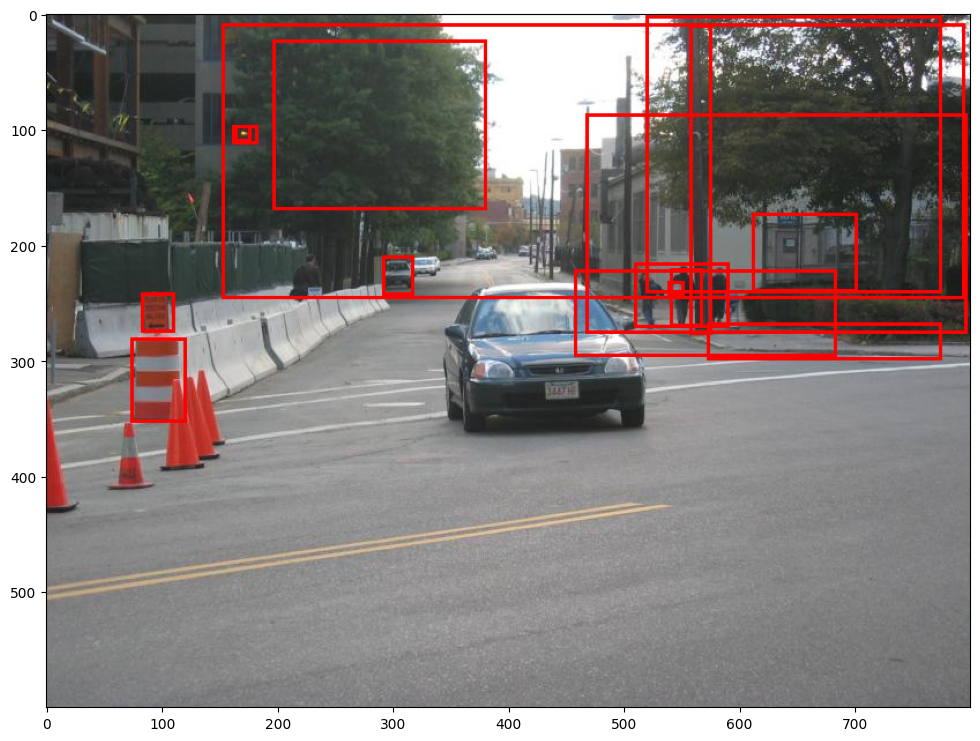

In [23]:
imCopy = image.copy()
imageDraw = ImageDraw.Draw(imCopy)
for item in dataItemAttr['attributes'][:]:
    x1, y1, x2, y2 = item['x'], item['y'], item['w'], item['h']
    print(x1, y1, x2, y2, item['names'][0])
    imageDraw.rectangle([(x1, y1), (x2 + x1, y2 + y1)], outline ="red", width=3) 
plt.figure(figsize=(16,9))
plt.imshow(imCopy)
        

In [24]:
dataItemSG = dataSG[268]
dataItemSG

{'relationships': [{'synsets': ['along.r.01'],
   'predicate': 'ON',
   'relationship_id': 3726079,
   'object_id': 1634836,
   'subject_id': 3563091},
  {'synsets': ['walk.v.01'],
   'predicate': 'walking on',
   'relationship_id': 3726080,
   'object_id': 1634837,
   'subject_id': 3563092},
  {'synsets': ['have.v.01'],
   'predicate': 'holding',
   'relationship_id': 3726081,
   'object_id': 1634839,
   'subject_id': 1634838},
  {'synsets': ['along.r.01'],
   'predicate': 'ON',
   'relationship_id': 3726082,
   'object_id': 3563093,
   'subject_id': 1634838},
  {'synsets': ['in.r.01'],
   'predicate': 'IN',
   'relationship_id': 3726083,
   'object_id': 1634840,
   'subject_id': 3563094},
  {'synsets': ['park.v.01'],
   'predicate': 'parked under',
   'relationship_id': 3726084,
   'object_id': 1634841,
   'subject_id': 3563095}],
 'image_id': 269,
 'objects': [{'synsets': ['leaf.n.01'],
   'h': 147,
   'object_id': 1634834,
   'names': ['leaves'],
   'w': 185,
   'y': 22,
   'x': 19

## Build a Module for Attribute Encoder

In [40]:
attributeEncoder = []
for image in dataAttr[:]:
    for object in image['attributes']:
        if('attributes' in object.keys()):
            for item in object['attributes']:
                attributeEncoder.append(item)

attributeEncoder = list(dict.fromkeys(attributeEncoder))
attributeEncoder.append('none')
print('number of attributes: ', len(attributeEncoder))
label_encoder = LabelEncoder()
label_encoder.fit(attributeEncoder)

number of attributes:  80259


LabelEncoder()

In [66]:
ex = ['tall', 'none']
encoded_labels = label_encoder.transform(ex)
print(encoded_labels)

[69609 50852]


In [49]:
word = 'tall'
encoded_label = label_encoder.transform([word])[0]
print(f"Mã hóa của từ '{word}': {encoded_label}")
decoded_label = label_encoder.inverse_transform([encoded_label])
print(f"Nhãn '{encoded_label}' tương ứng với từ: {decoded_label[0]}")

Mã hóa của từ 'tall': 69609
Nhãn '69609' tương ứng với từ: tall


In [63]:
type(int(label_encoder.transform(['none'])[0]))

int

In [62]:
type(0)
int

int

In [71]:
# Extract objects and IDs
objects = []

for image in dataAttr[:8000]:
    objects = []
    for object in image['attributes']:
        #object.pop('synsets')
        objects.append(
            {
                'id': object['object_id'], 
                #'name': object['names'][0],
                'bbox': [object['x'], object['y'], object['w'], object['h']],
                'attributes': [int(label_encoder.transform([item])[0]) for item in object['attributes']] if 'attributes' in object.keys() else [int(label_encoder.transform(['none'])[0])]
            }
        )
    with open(vgRoot + "ExtractAttribute/" + str(image['image_id']) + ".json", "w") as outfile:
        json.dump(objects, outfile)
    
## Convert to DataFrame
# df = pd.DataFrame(objects)
# # Save to CSV
# df.to_csv('visualgenome_objects.csv', index=False)